In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
import sklearn 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/summeranalytics2020/train.csv')

In [3]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [6]:
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

In [7]:
(df['Attrition'].value_counts()/1470)*100

0    57.346939
1    53.401361
Name: Attrition, dtype: float64

In [8]:
data_n=df[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

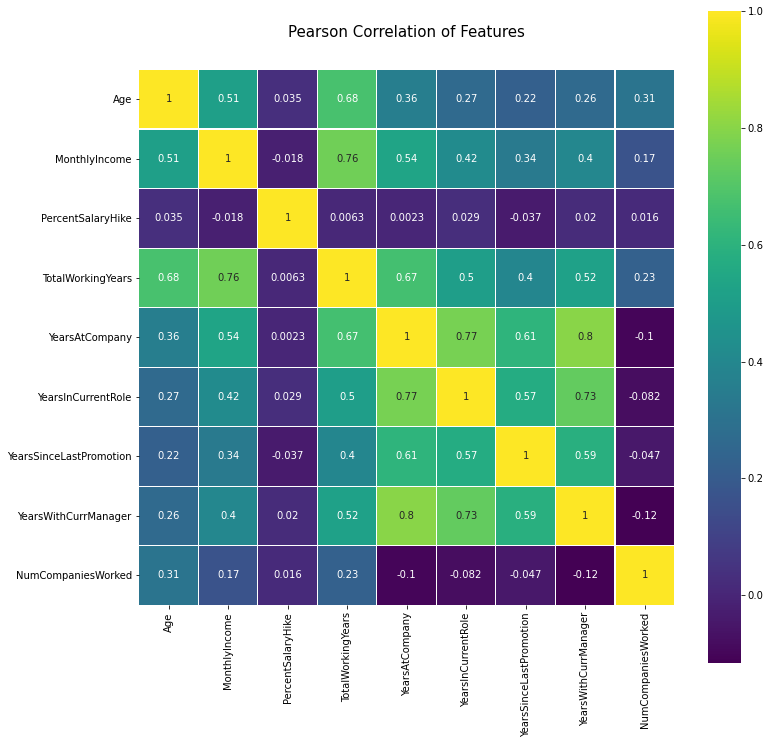

In [9]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [10]:
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

In [11]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                            , min_impurity_decrease = mid
                                            )
    scores = cross_val_score(estimator, x, y, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))

In [12]:
mid_opt = np.argmax(avg_scores)
print("The optimal value of 'min_impurity_decrease' is {0:.2f}".format(parameter_values[mid_opt])+
      " giving accuracy {0:.2f}".format(avg_scores[mid_opt]))

The optimal value of 'min_impurity_decrease' is 0.00 giving accuracy 1.00


In [13]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                       , min_impurity_decrease = 0.007
                                       )
model=estimator.fit(x,y)
y_pred = estimator.predict(x)
accuracy_full = np.mean(y == y_pred) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 100.0%


In [14]:
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [15]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False]
Feature Ranking: [24  1 15 22 21 18 10 25  4 12  2 11  3  1 26 13  1 23 19  5 14  8 17  7
  9 16  6 20]


28
['attrition', 'behaviour', 'businesstravel', 'communicationskill', 'department', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'id', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


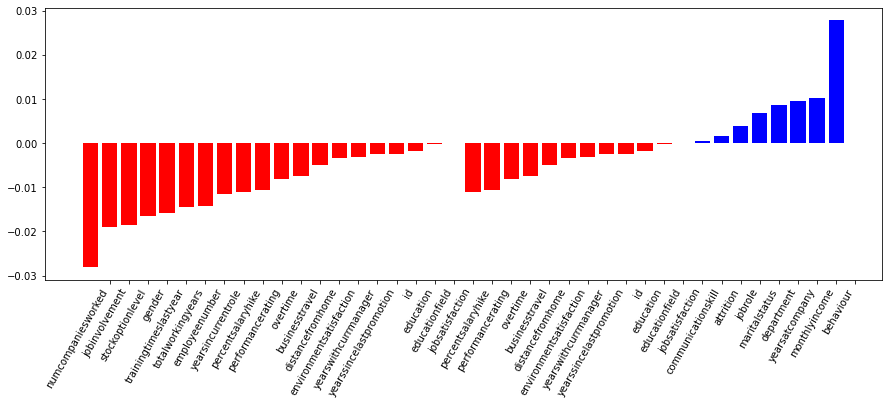

In [16]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())

In [17]:
#start_time = time.time()

train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1628
For Train Set : 915
For Validation Set : 306
For Test Set : 407


Acc Train: 0.872131, Acc Val:0.826797
Acc Train: 0.873224, Acc Val:0.839869
Acc Train: 0.897268, Acc Val:0.852941
Acc Train: 0.907104, Acc Val:0.866013
Acc Train: 0.978142, Acc Val:0.970588
Acc Train: 0.987978, Acc Val:0.986928
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000


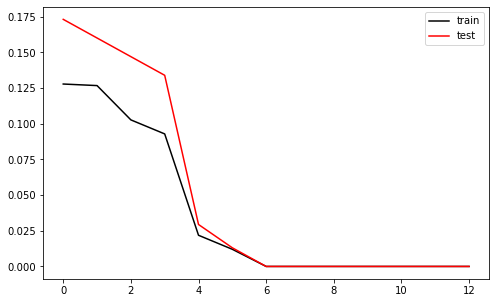

In [18]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=750, random_state=52)

In [20]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=52)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.862


In [21]:
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)

LogisticRegression(C=10, random_state=52)

In [22]:


logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)
start_time = time.time()


model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))



True         0    1
Predicted          
0          193   35
1           17  162
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       210
           1       0.91      0.82      0.86       197

    accuracy                           0.87       407
   macro avg       0.88      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407

0.8722358722358723
Duration: --- 0.00022295713424682617 Minutes ---


ROC AUC: 0.87


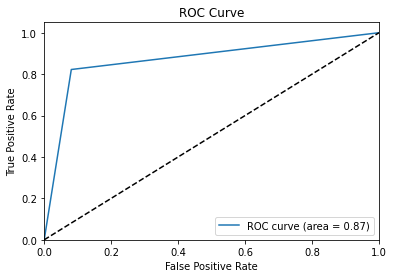

In [23]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.7434853222795919

In [25]:


y_train.value_counts()



0    478
1    437
Name: Attrition, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=r_state,k_neighbors=9)
#sdf=sm.fit_sample(x_train,y_train)
#x_train_smote=pd.DataFrame(list(sdf[0]),columns=x_train.columns)
#y_train_smote=pd.DataFrame(list(sdf[1]),columns=['Attrition'])
x_train_smote, y_train_smote=sm.fit_resample(x_train,y_train)

Using TensorFlow backend.


Acc Train: 0.868201, Acc Val:0.820261
Acc Train: 0.870293, Acc Val:0.826797
Acc Train: 0.888075, Acc Val:0.839869
Acc Train: 0.910042, Acc Val:0.872549
Acc Train: 0.979079, Acc Val:0.970588
Acc Train: 0.992678, Acc Val:0.986928
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000


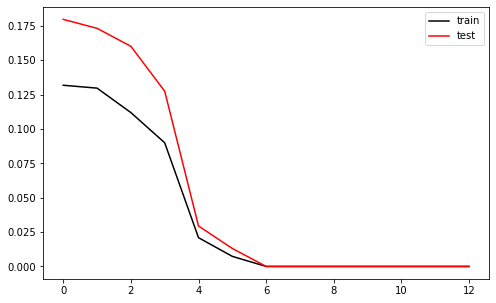

True         0    1
Predicted          
0          193   33
1           17  164
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       210
           1       0.91      0.83      0.87       197

    accuracy                           0.88       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.88      0.88      0.88       407

0.8771498771498771
Duration: --- 0.00020974079767862956 Minutes ---
ROC AUC: 0.88


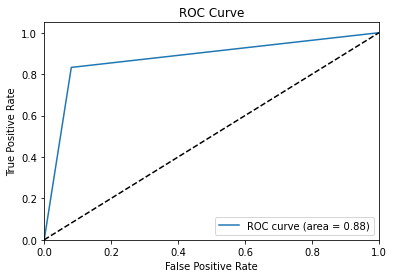

Kappa score is :0.7534289730044104


In [27]:
# Finding the best c value
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train_smote, y_train_smote)
    score_train = clf.score(x_train_smote, y_train_smote)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

logreg = LogisticRegression(random_state=r_state,C=100)
logreg.fit(x_train_smote, y_train_smote)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))